In [45]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
fittedparamslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
covariancemat = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
printresidual(fittingmodel,modeldata,osumidata,fittedparamslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics


Model has 25 fitted parameters, 17 of which have a bayesian prior
Total Residual:                        1007.3
Components of residual:
Concentration Trajectories (Figure 2): 418.6
Initial Reaction Rate (Figure 3A):     135.2
Mg2PPi solubility (Figure 3B):         216.4
Parameter priors:                      159.5
pH Effect Data:                        77.6


In [46]:
df = CSV.read("../data/external/samnuan/samnuanMgNTP2.csv", DataFrame)
sammnuan2data = Matrix(df)
df = CSV.read("../data/external/samnuan/samnuanMgNTP4.csv", DataFrame)
sammnuan4data = Matrix(df)
df = CSV.read("../data/external/samnuan/samnuanMgNTP6.csv", DataFrame)
sammnuan6data = Matrix(df)
df = CSV.read("../data/external/samnuan/3factorDOE/samnuanOAc0.csv", DataFrame)
sammnuanOAc0data = Matrix(df)
df = CSV.read("../data/external/samnuan/3factorDOE/samnuanOAc10.csv", DataFrame)
sammnuanOAc10data = Matrix(df)
df = CSV.read("../data/external/samnuan/3factorDOE/samnuanOAc100.csv", DataFrame)
sammnuanOAc100data = Matrix(df)
df = CSV.read("../data/external/samnuan/3factorDOE/samnuanCl0.csv", DataFrame)
sammnuanCl0data = Matrix(df)
df = CSV.read("../data/external/samnuan/3factorDOE/samnuanCl10.csv", DataFrame)
sammnuanCl10data = Matrix(df)
df = CSV.read("../data/external/samnuan/3factorDOE/samnuanCl100.csv", DataFrame)
sammnuanCl100data = Matrix(df);

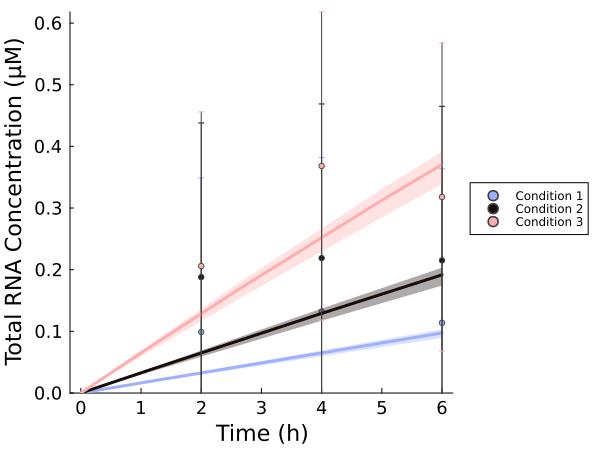

In [47]:
samnuanls = fittedparamslist
plt = plotfromcsv(fittingmodel,samnuanls,covariancemat,"../data/external/samnuan/samnuanrefactoreddata.csv",range = [1,2,3],plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = false, seperateDNA = false)

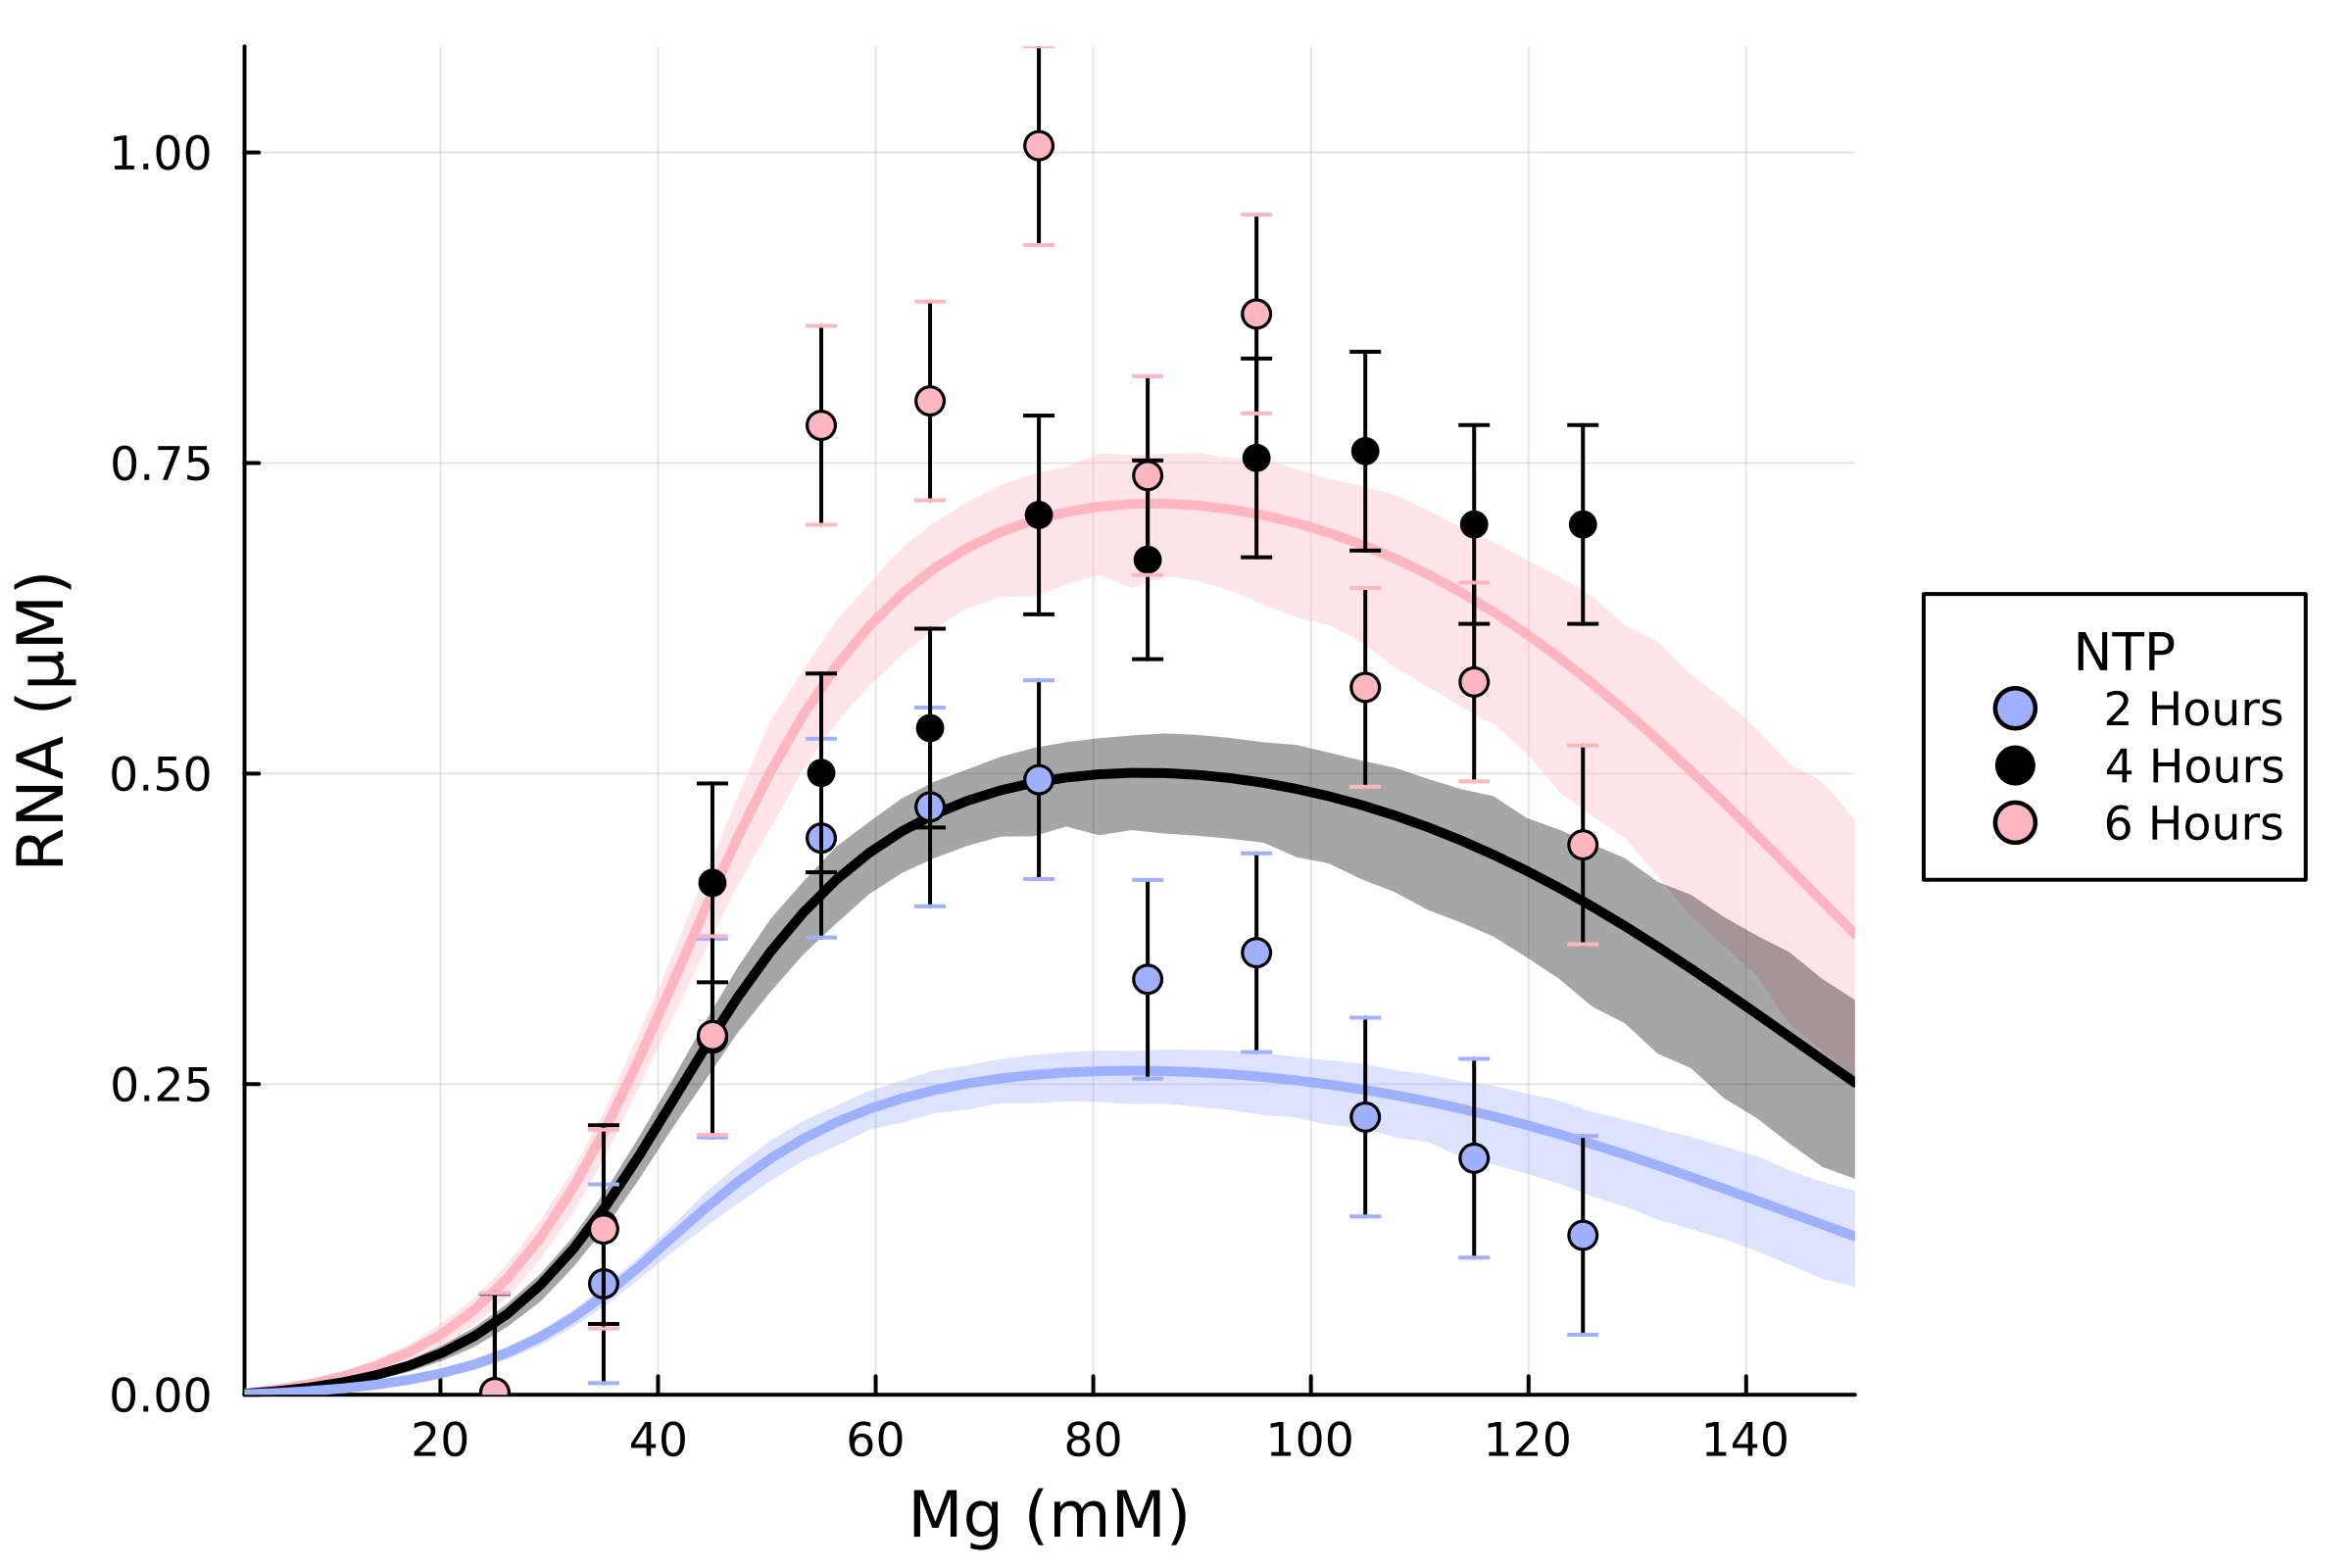

In [48]:
masternmc = 1000
plt = plotbyMg(fittingmodel,sammnuan2data,samnuanls, covariancemat; label = "2 Hours", T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08,Mgrange = (2e-3,150e-3), showconfidence = true, nmc = masternmc,precip = false, seperateDNA = false, OAccounterion = true)
plotbyMg!(plt,fittingmodel,sammnuan4data,samnuanls, covariancemat; label = "4 Hours", T7RNAP = 16e-9, DNA = 1, finaltime = 4, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08,Mgrange = (2e-3,150e-3), showconfidence = true, nmc = masternmc,precip = false, seperateDNA = false, colorscheme = :greys, OAccounterion = true)
plotbyMg!(plt,fittingmodel,sammnuan6data,samnuanls, covariancemat; label = "6 Hours", T7RNAP = 16e-9, DNA = 1, finaltime = 6, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08,Mgrange = (2e-3,150e-3), showconfidence = true, nmc = masternmc,precip = false, seperateDNA = false, colorscheme = :reds, OAccounterion = true)
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/samnuanMg.png")
plt

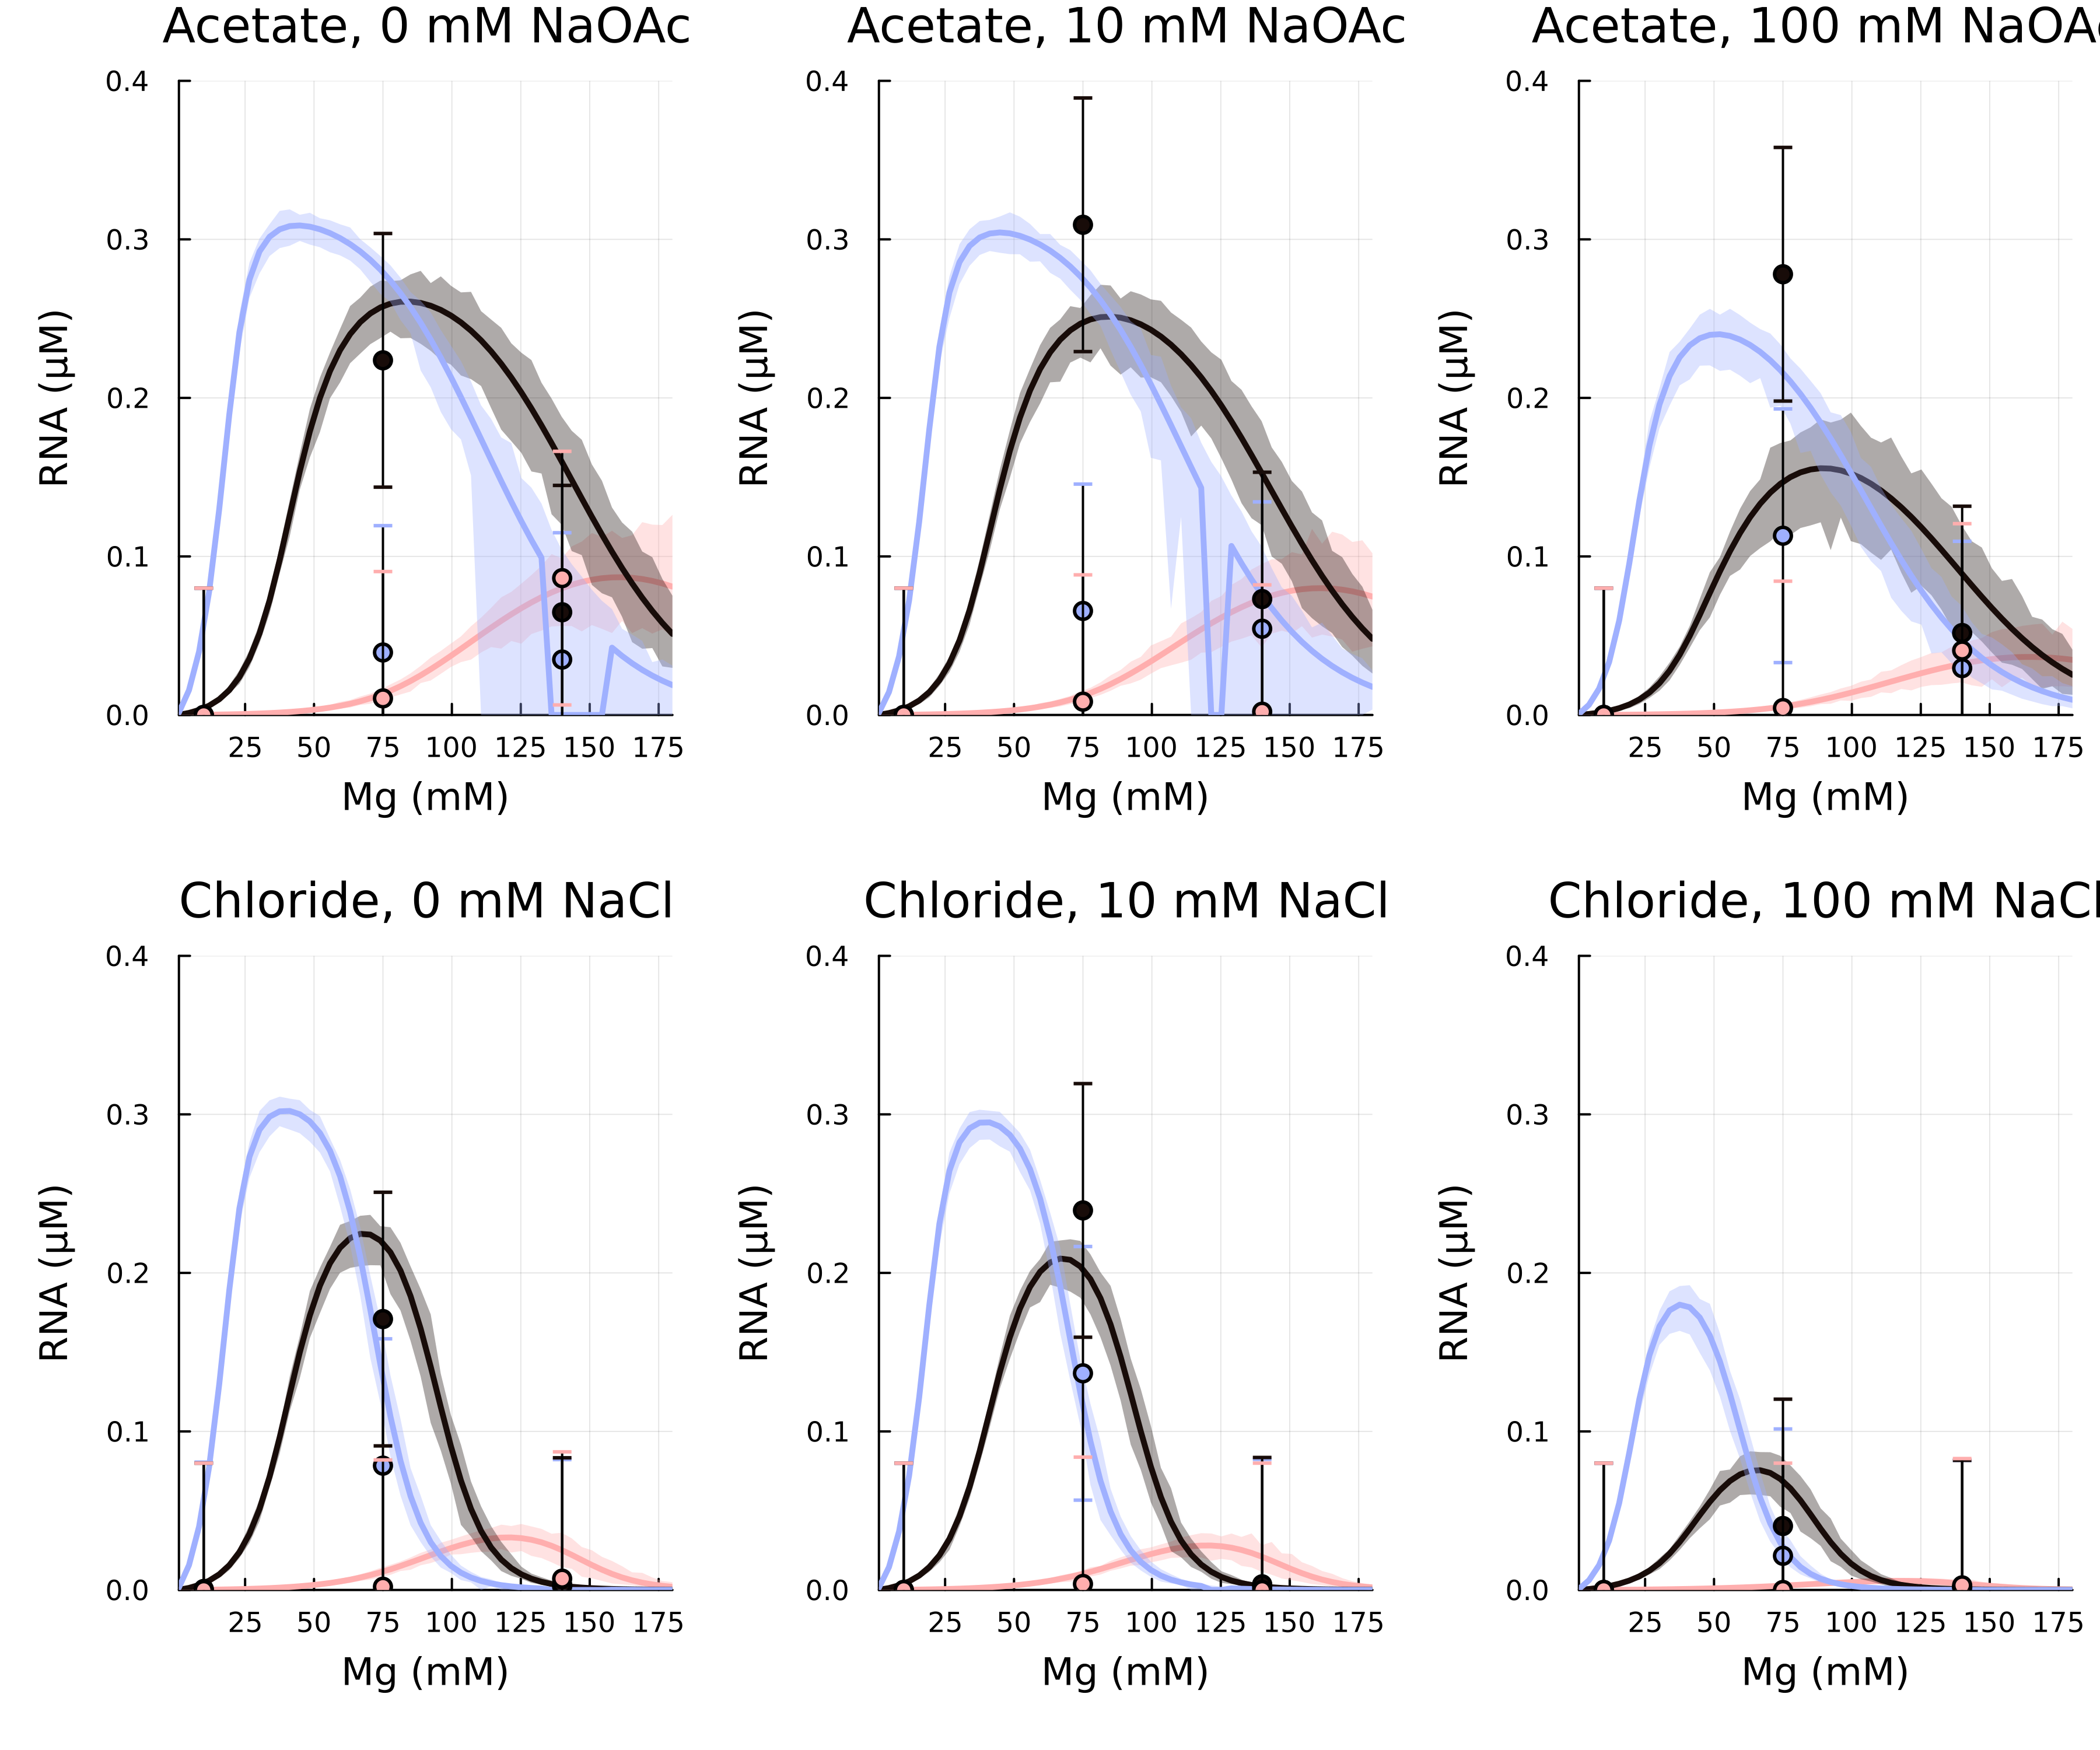

In [49]:
masternmc = 100
pltOAc0 = plot(ylims = (0,0.4), title = "Acetate, 0 mM NaOAc")
plotbyMg!(pltOAc0,fittingmodel,sammnuanOAc0data,samnuanls, covariancemat; Mgrange = (1e-3,180e-3), T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08, showconfidence = true, nmc = masternmc, precip = false, seperateDNA = false, colorscheme = :berlin, OAccounterion = true, Naanion = 0e-3)

pltOAc10 = plot(ylims = (0,0.4), title = "Acetate, 10 mM NaOAc")
plotbyMg!(pltOAc10,fittingmodel,sammnuanOAc10data,samnuanls, covariancemat; Mgrange = (1e-3,180e-3), T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08, showconfidence = true, nmc = masternmc, precip = false, seperateDNA = false, colorscheme = :berlin, OAccounterion = true, Naanion = 10e-3)

pltOAc100 = plot(ylims = (0,0.4), title = "Acetate, 100 mM NaOAc")
plotbyMg!(pltOAc100,fittingmodel,sammnuanOAc100data,samnuanls, covariancemat; Mgrange = (1e-3,180e-3), T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08, showconfidence = true, nmc = masternmc, precip = false, seperateDNA = false, colorscheme = :berlin, OAccounterion = true, Naanion = 100e-3)

pltCl0 = plot(ylims = (0,0.4), title = "Chloride, 0 mM NaCl")
plotbyMg!(pltCl0,fittingmodel,sammnuanCl0data,samnuanls, covariancemat; Mgrange = (1e-3,180e-3), T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08, showconfidence = true, nmc = masternmc, precip = false, seperateDNA = false, colorscheme = :berlin, OAccounterion = false, Naanion = 0e-3)

pltCl10 = plot(ylims = (0,0.4), title = "Chloride, 10 mM NaCl")
plotbyMg!(pltCl10,fittingmodel,sammnuanCl10data,samnuanls, covariancemat; Mgrange = (1e-3,180e-3), T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08, showconfidence = true, nmc = masternmc, precip = false, seperateDNA = false, colorscheme = :berlin, OAccounterion = false, Naanion = 10e-3)

pltCl100 = plot(ylims = (0,0.4), title = "Chloride, 100 mM NaCl")
plotbyMg!(pltCl100,fittingmodel,sammnuanCl100data,samnuanls, covariancemat; Mgrange = (1e-3,180e-3), T7RNAP = 16e-9, DNA = 1, finaltime = 2, PPiase = 0, stoich = (2500,2500,2500,2500), datastddev = 0.08, showconfidence = true, nmc = masternmc, precip = false, seperateDNA = false, colorscheme = :berlin, OAccounterion = false, Naanion = 100e-3)

plt = plot(pltOAc0,pltOAc10,pltOAc100, pltCl0,pltCl10,pltCl100, layout = (2,3), size = (900,750), bottommargin =5mm, leftmargin = 5mm, legend = false, ylims = (0,0.4))
plot!(dpi = 400)
savefig(plt,"../figures/GM6_27/samnuanNaCl.png")
plt